In [2]:
import pandas as pd
import numpy as np
import pickle as tickle_my_balls_and_call_me
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import nltk
from nltk.sentiment import SentimentAnalyzer

# Load Data

In [4]:
nyt_df = pd.read_csv('data/scraped/nyt_bitcoin.csv', index_col = 0)
nyt_df.published = pd.to_datetime(nyt_df.published, utc=True)#.dt.tz_localize('UTC')
nyt_df.index=nyt_df.published
nyt_df = nyt_df.sort_index()

In [34]:
bbc_df = pd.read_csv('data/scraped/bbc_bitcoin.csv', index_col = 0)
bbc_df.published = pd.to_datetime(bbc_df.published, utc=True)#.dt.tz_localize('UTC')
bbc_df.index=bbc_df.published
bbc_df = bbc_df.sort_index()

In [6]:
cnn_df = pd.read_csv('data/scraped/cnn_bitcoin.csv', index_col = 0)
cnn_df.published = pd.to_datetime(cnn_df.published, utc=True)#.dt.tz_localize('UTC')
cnn_df.index=cnn_df.published
cnn_df = cnn_df.sort_index()

In [7]:
reuters_df = pd.read_csv('data/scraped/reuters_bitcoin.csv', index_col = 0)
reuters_df.published = pd.to_datetime(reuters_df.published, utc=True)#.dt.tz_localize('UTC')
reuters_df.index=reuters_df.published
reuters_df = reuters_df.sort_index()

/usr/local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [71]:
bbc_pass = bbc_df.loc[bbc_df['content'].str.split().apply(len) > 20]
print(len(bbc_df['content']))
print(len(bbc_pass))

334
329


In [73]:
np.mean(bbc_pass['content'].str.split().apply(len).values)

450.81762917933133

In [96]:
print(bbc_pass.published.min())
print(bbc_pass.published.max())

2011-06-21 23:11:04+00:00
2019-05-09 23:04:05+00:00


In [87]:
nyt_pass = nyt_df.loc[nyt_df['content'].str.split().apply(len) > 20]
print(len(nyt_df['content']))
print(len(nyt_pass))

402
402


In [88]:
np.mean(nyt_pass['content'].str.split().apply(len).values)

1011.2935323383084

In [97]:
print(nyt_pass.published.min())
print(nyt_pass.published.max())

2012-01-16 06:01:41+00:00
2019-05-21 00:00:00+00:00


In [89]:
reuters_pass = reuters_df.loc[reuters_df['content'].str.split().apply(len) > 20]
print(len(reuters_df['content']))
print(len(reuters_pass))

729
720


In [90]:
np.mean(reuters_pass['content'].str.split().apply(len).values)

379.4888888888889

In [98]:
print(reuters_pass.published.min())
print(reuters_pass.published.max())

2012-04-01 19:01:00+00:00
2019-05-17 05:35:00+00:00


In [91]:
cnn_pass = cnn_df.loc[cnn_df['content'].str.split().apply(len) > 20]
print(len(cnn_df['content']))
print(len(cnn_pass))

602
602


In [92]:
np.mean(cnn_pass['content'].str.split().apply(len).values)

543.6229235880398

In [99]:
print(cnn_pass.published.min())
print(cnn_pass.published.max())

2012-08-22 00:00:00+00:00
2019-05-23 00:00:00+00:00


#### len(cnn_pass) + len(reuters_pass) + len(nyt_pass) + len(bbc_pass)

#### Second: CC and (V)CRIX

In [4]:
btc_prices = pd.read_csv('data/BTC_price_201305_201903.csv', header=None, index_col=0).fillna(method='ffill')
btc_prices.columns = ['PRICE']
btc_prices.index.name =  'DAY'
btc_prices.index = pd.to_datetime(btc_prices.index)
# log ret
btc_log_ret = np.log(btc_prices)
btc_log_ret = btc_log_ret.diff().fillna(0)

In [5]:
crix = pd.read_csv('data/crix.csv', index_col = 'date')
crix.index = pd.to_datetime(crix.index)
vcrix = pd.read_csv('data/vcrix.csv', usecols=[2,3],index_col = 'date')
vcrix.index = pd.to_datetime(vcrix.index)

In [6]:
new_vcrix = pd.read_csv('data/new_vcrix', usecols=[1,4],index_col = 'Date')
new_vcrix.index = pd.to_datetime(new_vcrix.index)

# Data Analysis

In [29]:
len(nyt_df.content[:].values.reshape(-1,1)[0][0])

7341

In [49]:
_lengths_listcompre = [len(str(element)) for element in nyt_df[:].content.values]

[    3     3     3     3     3     3     3     3     3     3     3     3
     3     3     3     3     3     3     3     3   358   454   805   841
   918   948   979   988  1029  1048  1094  1137  1222  1274  1292  1311
  1424  1655  1671  1703  1714  1715  1773  1779  1799  1819  1877  1903
  1953  1998  2007  2034  2082  2124  2170  2173  2220  2245  2250  2284
  2310  2316  2316  2340  2349  2351  2369  2369  2376  2493  2503  2625
  2630  2702  2706  2711  2732  2732  2739  2765  2775  2777  2854  2854
  2865  2867  2918  2928  3012  3044  3051  3073  3124  3138  3141  3143
  3168  3216  3230  3232  3242  3248  3348  3369  3388  3398  3400  3471
  3479  3484  3488  3574  3581  3582  3614  3648  3663  3698  3698  3703
  3723  3739  3760  3779  3780  3786  3788  3812  3830  3832  3914  3921
  3926  3928  3933  3942  3945  3984  4014  4020  4045  4084  4103  4115
  4130  4138  4147  4173  4188  4211  4222  4233  4234  4254  4283  4286
  4349  4385  4390  4391  4400  4410  4428  4476  4

In [51]:
np.sum(_lengths_listcompre)

2477387

### NLTK

In [55]:
first_nyt_article = nyt_df.content[0]

In [ ]:
nltk.sentiment

In [53]:
sa = SentimentAnalyzer()

## Textblob

In [9]:
from textblob import TextBlob

In [61]:
analysis = TextBlob(first_nyt_article)

In [62]:
analysis.sentiment

Sentiment(polarity=0.11859100119738421, subjectivity=0.490705228577569)

In [68]:
TextBlob(first_nyt_article).sentiment[0]

0.11859100119738421

In [10]:
nyt_df['textblob_sent'] = [TextBlob(str(e)).sentiment[0] for e in nyt_df.content]
bbc_df['textblob_sent'] = [TextBlob(str(e)).sentiment[0] for e in bbc_df.content]

In [11]:
nyt_df['textblob_pola'] = [TextBlob(str(e)).sentiment[1] for e in nyt_df.content]
bbc_df['textblob_pola'] = [TextBlob(str(e)).sentiment[1] for e in bbc_df.content]

In [12]:
nyt_articles_per_day = nyt_df.groupby([pd.Grouper(key='published', freq='D')])['content'].count()
nyt_articles_per_week = nyt_df.groupby([pd.Grouper(key='published', freq='W-MON')])['content'].count()
nyt_articles_per_month = nyt_df.groupby([pd.Grouper(key='published', freq='M')])['content'].count()

In [13]:
bbc_articles_per_day = bbc_df.groupby([pd.Grouper(key='published', freq='D')])['content'].count()
bbc_articles_per_week = bbc_df.groupby([pd.Grouper(key='published', freq='W-MON')])['content'].count()
bbc_articles_per_month = bbc_df.groupby([pd.Grouper(key='published', freq='M')])['content'].count()

In [14]:
nyt_sent_mean_day = nyt_df.groupby([pd.Grouper(key='published', freq='D')])['textblob_sent'].mean().fillna(0)
bbc_sent_mean_day = bbc_df.groupby([pd.Grouper(key='published', freq='D')])['textblob_sent'].mean().fillna(0)

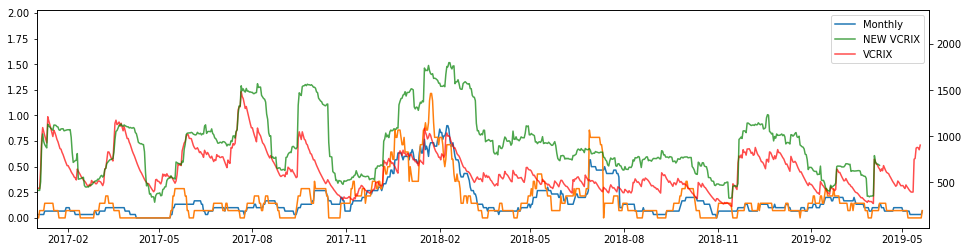

In [16]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,4)
start_date = pd.to_datetime('2017-01-01 00:00:00')
stop_date = pd.to_datetime('2019-05-28 00:00:00')
ax.set_xlim(start_date,stop_date)
# _plotvar1 = nyt_articles_per_day.rolling(30).mean()+bbc_articles_per_day.rolling(30).mean()
_plotvar1 = (nyt_sent_mean_day.rolling(30).mean()+
             bbc_sent_mean_day.rolling(30).mean())
label1 = 'Monthly'

# line1=ax.plot(_plotvar1,label=label1)
# line2=ax.plot(nyt_df.textblob_pola.rolling(60).mean(),label='Polarity')
line1=ax.plot(nyt_articles_per_day.rolling(30).mean(),label='Monthly')
line2=ax.plot(nyt_articles_per_day.rolling(14).mean(),label='Fortnightly')
# line2 =  ax2.plot(btc_log_ret.rolling(30).mean(), label='BTC DR Smoothed', c = 'red', alpha = 0.7)

ax2 = ax.twinx()
# line3 = ax2.plot(btc_prices, label='BTC', c = 'red', alpha = 0.7)
line4 = ax2.plot(vcrix, label='VCRIX', c = 'red', alpha = 0.7)
line3 = ax2.plot(new_vcrix, label='NEW VCRIX', c = 'green', alpha = 0.7)
# line3 = ax2.plot(crix, label='CRIX', c = 'red', alpha = 0.7)
# line3 = ax2.plot(btc_log_ret, label='BTC DR', c = 'red', alpha = 0.7)
# line3 = ax2.plot(btc_log_ret.rolling(30).mean(), label='BTC DR Smoothed', c = 'red', alpha = 0.7)

# #make a shared legend for both subplots
lines = line1+line3+line4
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, handlelength=2, loc=0)

plt.savefig('plots/NYT_CRIX_Textblob.png', dpi=150, transparent=True)
plt.show()

## VADER

In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [64]:
vaser_analyser = SentimentIntensityAnalyzer()